In [27]:
library(igraph)


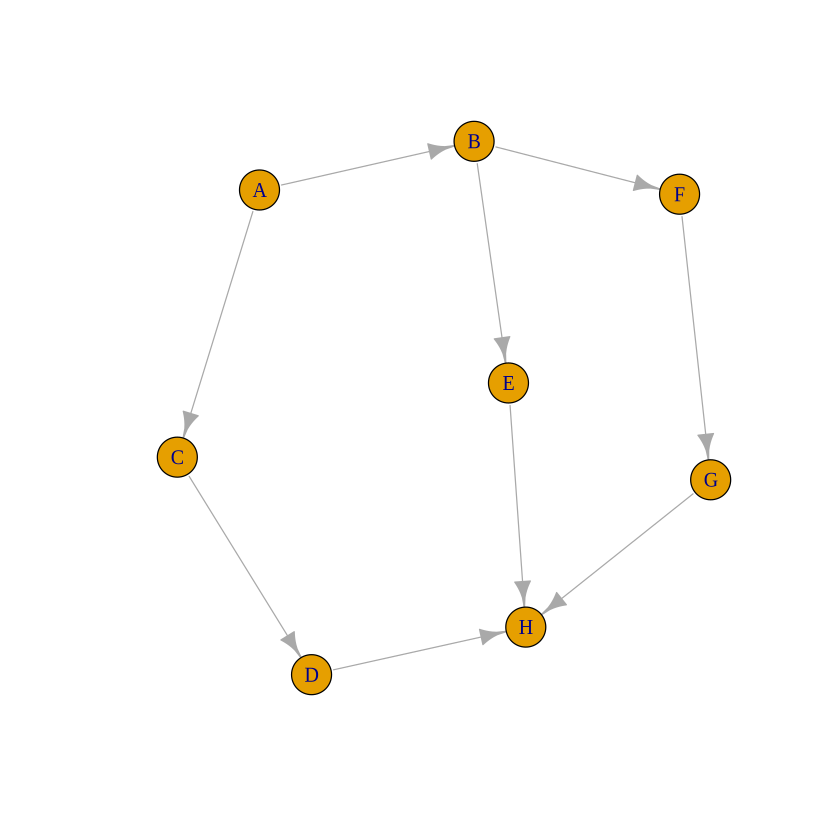

In [28]:
dist <- graph(edges = c("A", "C", "A", "B", "B", "E", "B", "F", "C", "D", "G", "H", "D", "H", "E", "H", "F", "G"), directed = TRUE)
plot(dist)


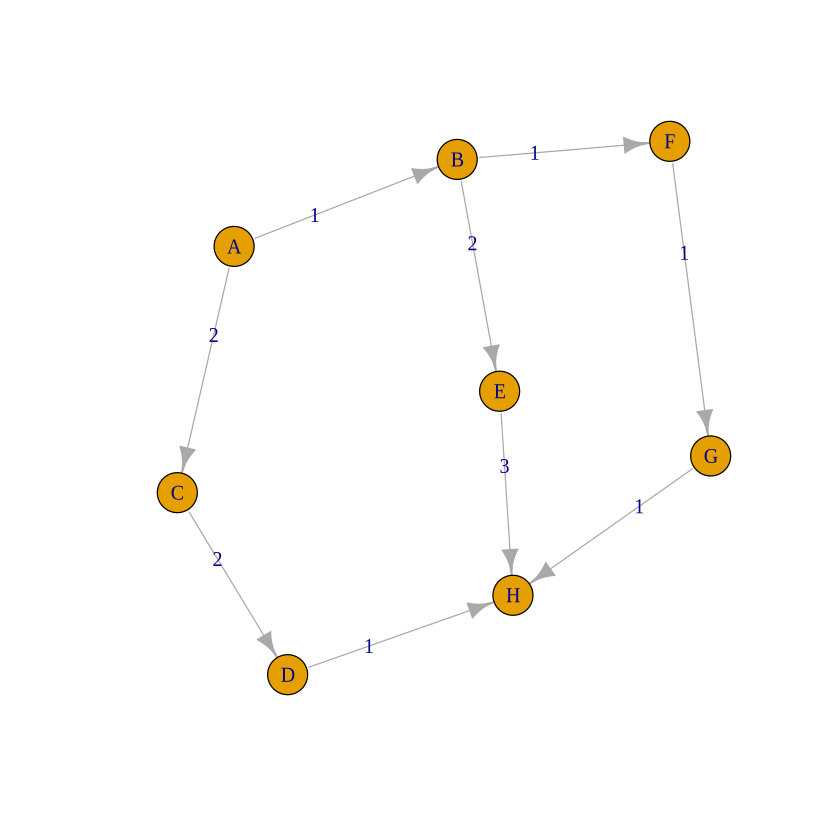

In [29]:
E(dist)$weight <- c(2, 1, 2, 1, 2, 1, 1, 3, 1)
plot(dist, edge.label = E(dist)$weight)
# tkplot(dist, edge.label = E(dist)$weight, vertex.color="white")


In [30]:
distances(dist, v = "A", to = V(dist))


,A,C,B,E,F,D,G,H
A,0,2,1,3,2,4,3,4


In [31]:
distances(dist, V(dist)$name == "A", V(dist)$name == "H")


,H
A,4


In [40]:
caminho <- shortest_paths(dist, V(dist)$name == "A", V(dist)$name == "H", output = "both")
caminho$vpath
caminho$epath


[[1]]
+ 5/8 vertices, named, from ce4c01d:
[1] A B F G H


[[1]]
+ 4/9 edges from ce4c01d (vertex names):
[1] A->B B->F F->G G->H


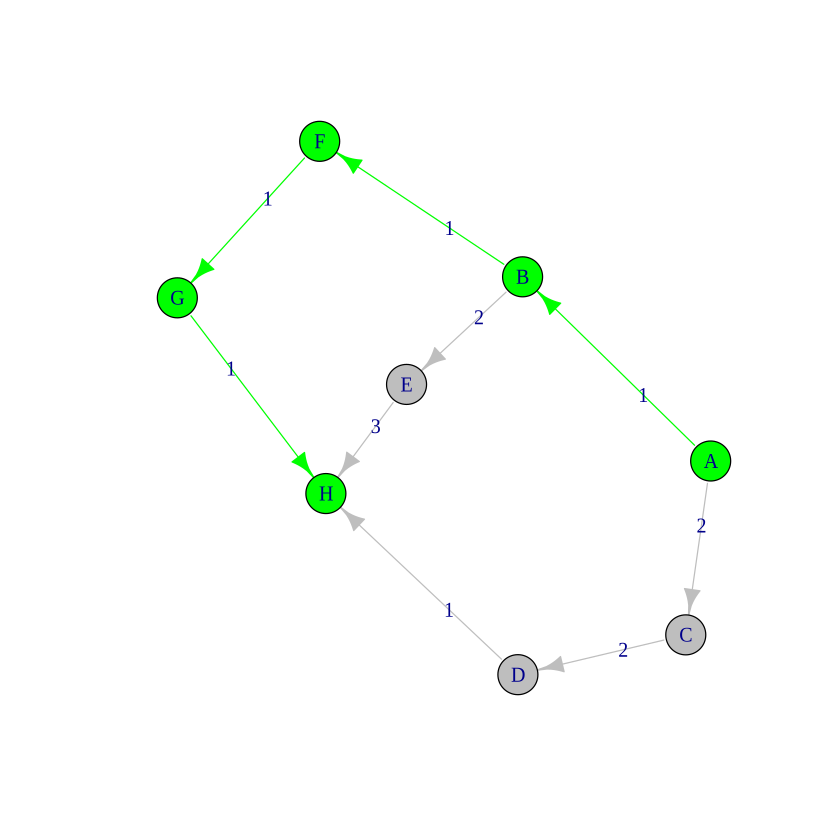

In [41]:
for (i in 1:length(V(dist))) {
    V(dist)$color[i] <- ifelse(i %in% as.vector(unlist(caminho$vpath)), "green", "gray")
}

for (i in 1:length(E(dist))) {
    E(dist)$color[i] <- ifelse(i %in% as.vector(unlist(caminho$epath)), "green", "gray")
}

plot(dist, edge.label = E(dist)$weight)
